<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/IEEE_Cognition_mind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random as rnd



```
# This is a note to be added
```

## Pure Oscillator and other Ocillators

In [ ]:
def physical_osc(x,t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    #return  [x[1], -a*np.sin(x[0]) ]
    #return  [x[1], - f*a*N*np.sin(N*x[0]) ]
    #return  [x[1], -a*np.sin(x[0]) - f*a*N*np.sin(N*x[0]) ]
    #return  [x[1], -a*np.sin(x[0])  - f*a*N*np.sin(N*x[0]) - b*x[1] ]
    return  [x[1], -a*np.sin(x[0]) - f*a*N*np.sin(N*x[0]) - b*x[1]+ c*np.sin(x[0])]

In [ ]:
def coupled_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2

    return  [x[1],  -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0])   ]

In [ ]:

def flip_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0]) + c*np.sin(x[0])]


## Following code is re-written with while loop
# Logic

    
    flip_elapsed_time = tou_0 // initialize
    while(!number_of_samples)
        calculate E
        calculate tou=tou_0*exp(E/kT)
        if(E/kT<1) system is in strong external energy receiving mode
            while loop till flip_elapsed_time != tou
                odeint(mind_oscillator)
                calculate tou=tou_0*exp(E/kT)
                flip_elapsed_time= flip_elapsed_time + 1
        if(E/kT>1) system is in nominal external energy receiving mode
            while loop till flip_lapsed_time != tou
                odeint(mind_oscillator)
                calculate tou=tou_0*exp(E/kT)
                flip_elapsed_time= flip_elapsed_time + 1






# Implementation

In [ ]:
I=1.0
a=4.0
b=0.1
c=0.5
f=0.3  # it should be a fraction
N=18 # No of anaisotropy in the potential well = 1+N/2
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=1.7    # at T=1.7 tou=5, E/kT > 1
print("kT :", k*T)

kT : 2.3459999999999996


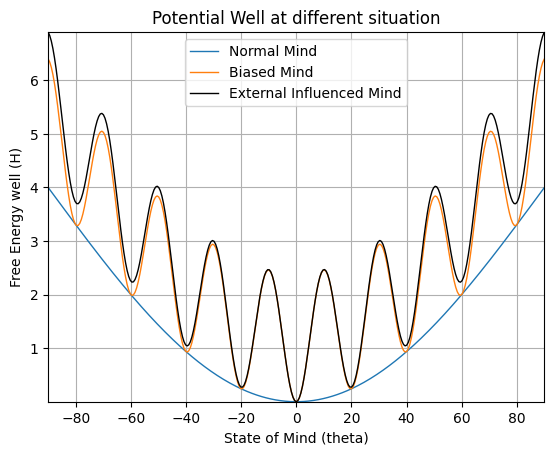

In [ ]:
# Mind Potential Equation biased because of  various brands in the market
t = np.arange(-np.pi/2,np.pi/2,0.01)   # start,stop,step
omega=0
# New Potential
H0 = 0.5*I*omega*omega + a*(1-np.cos(t))
H1 = 0.5*I*omega*omega + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t))
H2 = 0.5*I*omega*omega + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) + c*(1-np.cos(t))

# A plot of the fluid height (position) inside the straw as a function of time.
plt.title("Potential Well at different situation")
plt.margins(x=0, y=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(t*180/np.pi, H0, t*180/np.pi, H1, t*180/np.pi, H2, 'black', linewidth = 1)
plt.xlabel('State of Mind (theta)')
plt.ylabel('Free Energy well (H)')
plt.legend(['Normal Mind', 'Biased Mind', 'External Influenced Mind'])
plt.grid(True)

In [ ]:
def find_maxima_minima(series):
    maxima = []
    minima = []
    max_min = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            maxima.append((-np.pi/2 + np.pi*i/315 , series[i]))
            max_min.append((-np.pi/2 + np.pi*i/315 , series[i]))
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:
            minima.append((-np.pi/2 + np.pi*i/315, series[i] ))
            max_min.append((-np.pi/2 + np.pi*i/315 , series[i]))
    return maxima, minima, max_min

local_max, local_min, local_max_min = find_maxima_minima(H2)
print("Length of data",len(H2))
print("[angle,energy]")
print(local_max)
print(local_min)
print(local_max_min)
print("Length of data",len(local_max_min))
total_max_min = len(local_max_min)

Length of data 315
[angle,energy]
[(-1.2317037864074267, 5.383365843586606), (-0.8826379360085609, 4.022750999722045), (-0.5335720856096948, 3.009124213812167), (-0.1845062352108291, 2.465728057083877), (0.17453292519943275, 2.4678247281358323), (0.5235987755982991, 3.0094559762104764), (0.8726646259971647, 4.021756056073114), (1.2217304763960306, 5.3817127042682165)]
[(-1.3813034365783694, 3.696341742933389), (-1.0422108961908996, 2.2330568267060307), (-0.6931450457920338, 1.0421200762571086), (-0.3440791953931679, 0.2720699113694649), (-0.00498665500569806, 0.00012470080527812177), (0.3440791953931679, 0.2715990610666253), (0.6831717357806375, 1.042575261808003), (1.0322375861795035, 2.231320311709509), (1.3813034365783694, 3.696992613766754)]
[(-1.3813034365783694, 3.696341742933389), (-1.2317037864074267, 5.383365843586606), (-1.0422108961908996, 2.2330568267060307), (-0.8826379360085609, 4.022750999722045), (-0.6931450457920338, 1.0421200762571086), (-0.5335720856096948, 3.0091242

In [ ]:
def mind_osc(x, t):
    if   x[0] > 0.5*np.pi-.06:
        x[0]=0.5*np.pi - x[0] +0.06 # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi+0.06:
        x[0]=x[0] - 0.5*np.pi -0.06 # oscillate between -pi/2 to +pi/2
    return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0])]
    #return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0]) + c*x[1]]
    #return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0]) + c*np.sin(x[0])]

In [ ]:
# Next, we create an array of the desired times for the solution.
# Create an empty NumPy array of zeros
no_of_samples =49000
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.ones(no_of_samples)  # energy

I=1.0
a=4.0
b=0.8
c=0.8
f=0.3  # it should be a fraction
N=18 # No of anaisotropy in the potential well = 1+N/2
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=1.7    # at T=1.7 tou=5, E/kT > 1
print("kT :", k*T)

theta = np.pi/6 -.001
omega =0
tou_0=10
tou=tou_0

my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[theta, omega] # odeint takes init_value in terms of array only

enrg_array[0]= 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta)) + 0.5*c*omega*omega

flip_elapsed_time = 50 #int(tou)
print("energy, tau", enrg_array[0], tou)
print("E/kT:",enrg_array[0]/k*T )
i=0
E_high = 0
E_low  = 0

while i != no_of_samples:
    for m in range(0,int((total_max_min/2)),1):
        t1,e1 = local_max_min[2*m] # this is minima
        t2,e2 = local_max_min[2*m+1] # this is maxima
        if theta >=t1 and theta <= t2:
            tou=tou_0*np.exp(abs(e2-e1)/(k*T))
            #print("theta",theta, 180*t1/3.14,180*t2/3.14)
            #print("enrg", e1, e2)
            #print("tou", tou)

    solution = odeint(mind_osc, init_value, my_time)
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    time_array[i]=i
    theta=solution[1,0]
    omega=solution[1,1]
    init_value=[theta, omega]

    #enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta)) + f*a*(1-np.cos(N*theta)) + 0.5*c*omega*omega

    if velo_array[i-1] > velo_array[i - 2] and velo_array[i-1] > velo_array[i] and  abs(velo_array[i-1])<= 0.15:
        E_low = 1 # latch
        #print(c,i,"For E_low ",velo_array[i-2]," ",flip_elapsed_time)

    if velo_array[i-1] > velo_array[i - 2] and velo_array[i-1] > velo_array[i] and abs(velo_array[i-1]) > 0.15:
        E_high  = 1 # latch
        #print(c,i,"For E_high ",velo_array[i-2]," ",flip_elapsed_time)

    if   flip_elapsed_time < tou and E_high==1:
        #c=0.05 # normal operation
        enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta)) + f*a*(1-np.cos(N*theta)) + 0.5*c*omega*omega

    elif flip_elapsed_time < tou and E_low ==1:
        #c=2.5 # knowledge boost
        enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta)) + f*a*(1-np.cos(N*theta)) + 0.5*c*omega*omega
        #omega_sq= (2*abs(enrg_array[i] - enrg_array[i-1]) + I*omega*omega)/(I+c)
        omega = math.sqrt(I+c)*omega
        #omega=omega+ 0.3
        init_value=[theta, omega]
    elif flip_elapsed_time >= tou:
        flip_elapsed_time=0
        E_high = 0
        E_low  = 0
    #print(c," ",flip_elapsed_time," ",tou)
    flip_elapsed_time = flip_elapsed_time + 1
    i=i+1

print("End of while loop")



kT : 2.3459999999999996
energy, tau 2.933705722494985 10
E/kT: 3.613985310319909
End of while loop


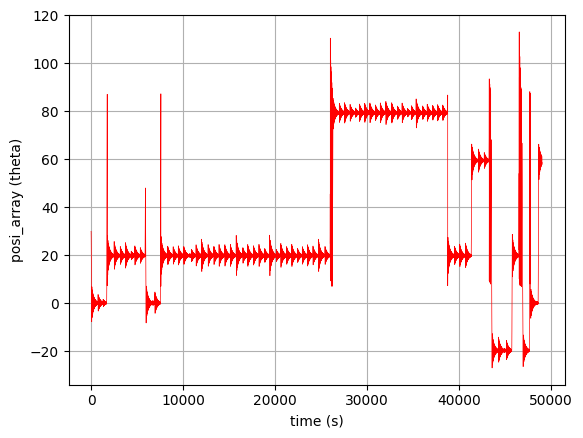

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(time_array[0:], 180*posi_array[0:]/np.pi,time_array[0:], 180*velo_array[0:]/np.pi,'red', linewidth = 0.5)
plt.plot(time_array[0:], 180*posi_array[0:]/np.pi,'red', linewidth = 0.5)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

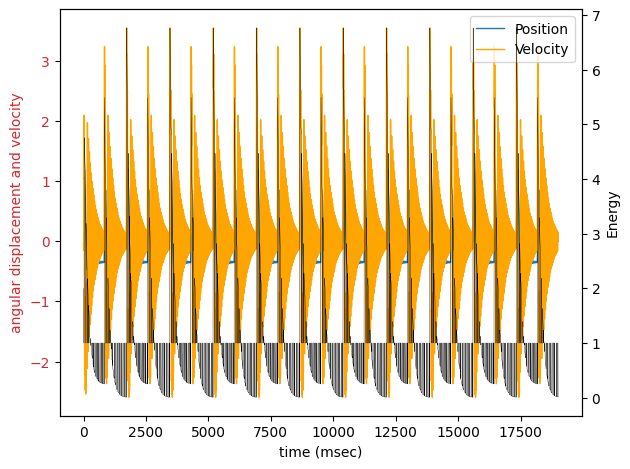

In [ ]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array[0:], posi_array[0:], time_array[0:], velo_array[0:],  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array[0:], enrg_array[0:], color='black', linewidth = 0.25)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:650], enrg_array[0:650],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

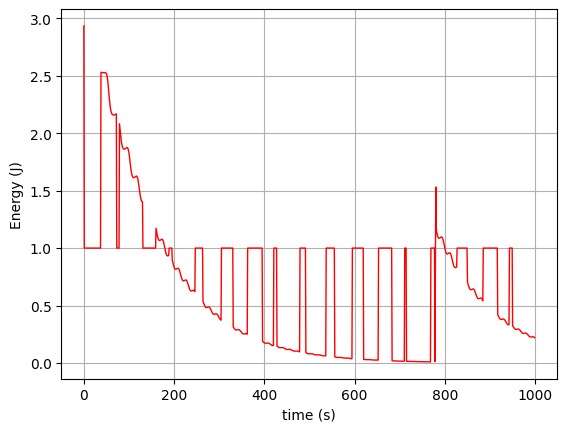

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:1000], enrg_array[0:1000],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('Energy (J)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)